<a href="https://colab.research.google.com/github/Akashn007/Akash_Kumar_N_INBT03975_AUG_2023/blob/main/Cifer10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 2: CIFAR-10 Dataset

##Dataset preparation

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets



##Model architecture and training

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
from matplotlib import pyplot
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#loading dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
#spliting of dataset
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.2)
print("train data: ",xtrain.shape)
print("test data: ",xtest.shape)

train data:  (40000, 32, 32, 3)
test data:  (10000, 32, 32, 3)


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras
from keras.models import Sequential
from tensorflow.keras import datasets,layers,models
from keras import regularizers
from keras.layers import Dense,Dropout,BatchNormalization
print(np.unique(ytrain))
print(np.unique(ytest))




[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
num_classes = len(np.unique(ytrain))
Y_train_encoded = to_categorical(y_train, num_classes)
Y_test_encoded = to_categorical(y_test, num_classes)
#normalize pixel values
xtrain,xtest=xtrain/255.0, xtest/255.0

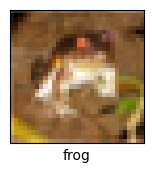

In [ ]:
#verifying data
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(1):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])
plt.show()

##VGG19 model

In [ ]:
#VGG19 model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

base_model = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

80134624/80134624 [==============================] - 0s 0us/step


##CNN model

In [ ]:
#CNN model
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.MaxPooling2D((2,2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

##Compiling and Training the model

In [ ]:
#compiling and trainig the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 28s 10ms/step - loss: 1.7617 - accuracy: 0.4051 - val_loss: 1.2851 - val_accuracy: 0.5318
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2033 - accuracy: 0.5708 - val_loss: 1.0980 - val_accuracy: 0.6111
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0546 - accuracy: 0.6292 - val_loss: 1.0672 - val_accuracy: 0.6258
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9714 - accuracy: 0.6607 - val_loss: 1.1792 - val_accuracy: 0.6068
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8927 - accuracy: 0.6901 - val_loss: 1.0599 - val_accuracy: 0.6408
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8401 - accuracy: 0.7080 - val_loss: 0.9902 - val_accuracy: 0.6651
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7913 - accuracy: 0.7237 - val_loss: 1.0147 - val_a

##Evaluation

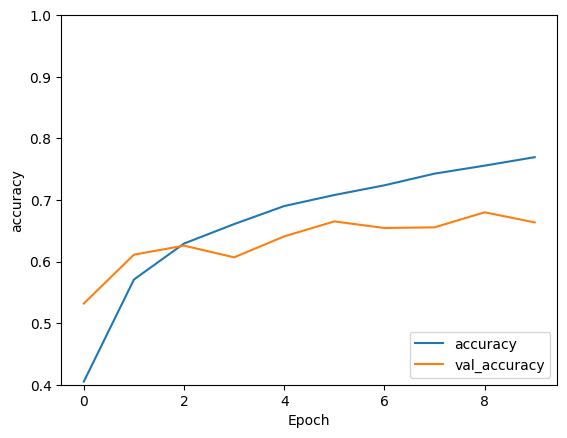

In [ ]:
#evaluating the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0.4,1])
plt.legend(loc='lower right')
losses,acc=model.evaluate(x_test,y_test,verbose=3)

In [ ]:
print('accuracy: {:.2f}%'.format(acc*100))

accuracy: 66.35%


##Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
prediction=model.predict(x_test)
true_value=np.argmax(prediction,axis=1)
conf_matrix = confusion_matrix(y_test, true_value)
print(conf_matrix)
print("accuracy:",accuracy_score(y_test,true_value)*100)
print("report:",classification_report(y_test,true_value))

313/313 [==============================] - 1s 3ms/step
[[642  11  72  24  49   7  19  10 147  19]
 [ 26 731   7  12   6   8  19   5  91  95]
 [ 51   5 493  41 174  75 101  25  31   4]
 [  9   6  92 416 122 154 128  24  40   9]
 [ 16   0  59  43 747  20  66  37  12   0]
 [  7   0  80 150  77 584  55  33   8   6]
 [  5   3  46  39  63  17 809   4  11   3]
 [ 14   4  48  31 169  74  15 628   5  12]
 [ 55  12  11  14  18   5  15   4 843  23]
 [ 35  55  11  13  14  15  12  16  87 742]]
accuracy: 66.35
report:               precision    recall  f1-score   support

           0       0.75      0.64      0.69      1000
           1       0.88      0.73      0.80      1000
           2       0.54      0.49      0.51      1000
           3       0.53      0.42      0.47      1000
           4       0.52      0.75      0.61      1000
           5       0.61      0.58      0.60      1000
           6       0.65      0.81      0.72      1000
           7       0.80      0.63      0.70      1000
   

In [ ]:
#confusion matirx
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center', fontsize=12, weight='bold',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [ ]:
def plot_normalized_confusion_matrix(cm, classes, title='Normalized Confusion Matrix', cmap=plt.cm.Blues):
    plot_confusion_matrix(cm, classes, normalize=True, title=title, cmap=cmap)
def plot_unnormalized_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plot_confusion_matrix(cm, classes, normalize=False, title=title, cmap=cmap)

Normalized Confusion Matrix


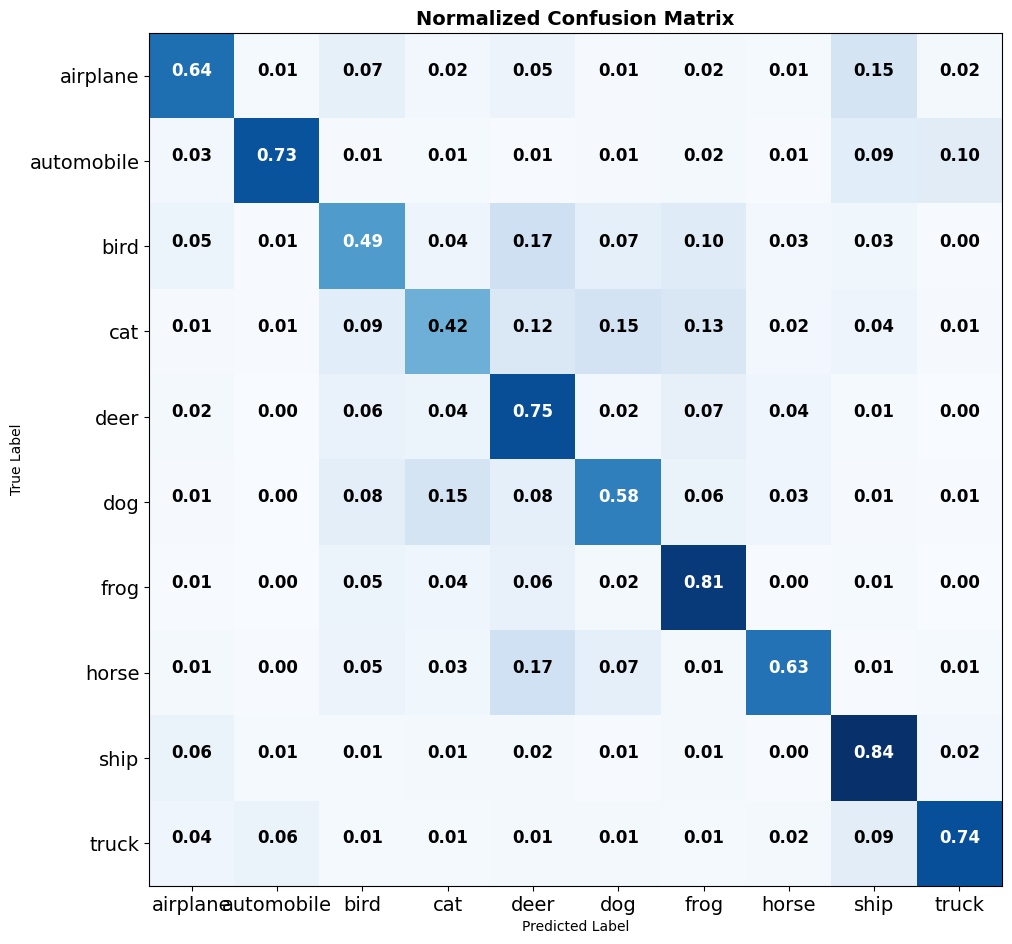

without normalization


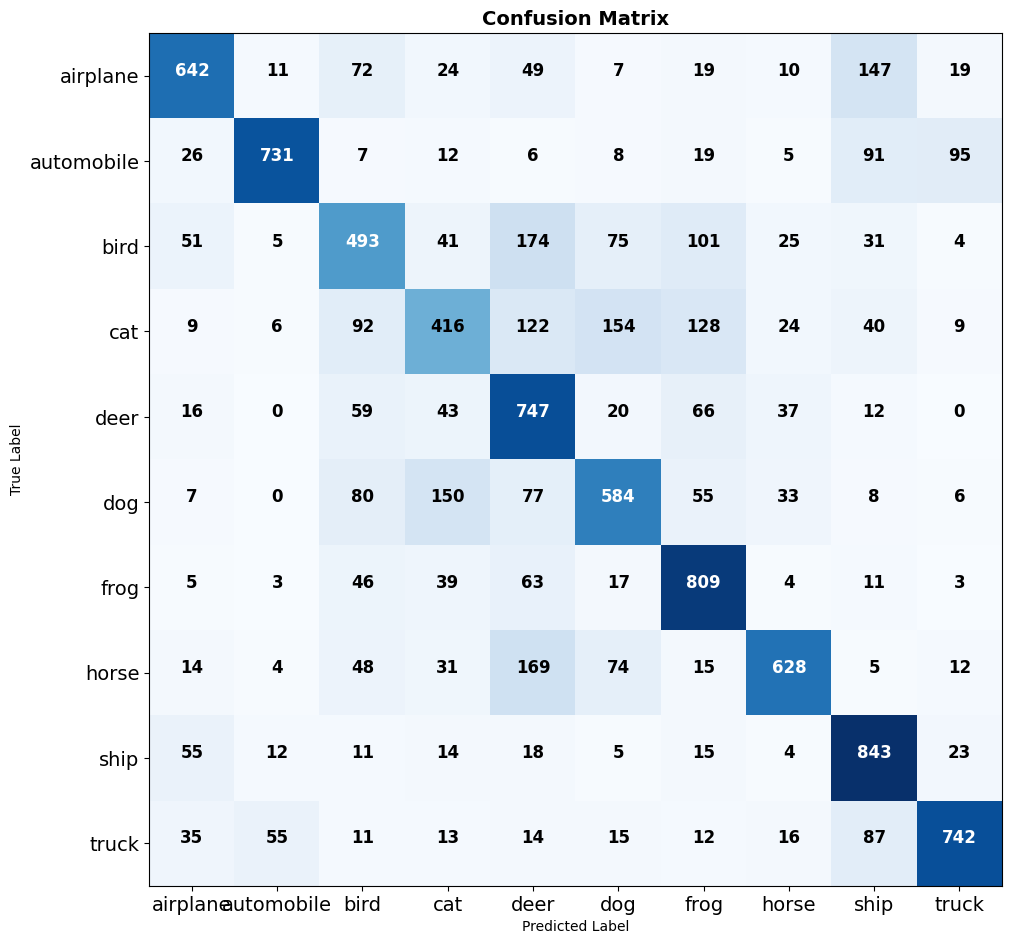

In [ ]:
#plotting the graphes
plt.figure(figsize=(10, 10))
plot_normalized_confusion_matrix(conf_matrix, classes=classes, title='Normalized Confusion Matrix')
plt.show()

plt.figure(figsize=(10, 10))
plot_unnormalized_confusion_matrix(conf_matrix, classes=classes, title='Confusion Matrix')
plt.show()